# Some examples using ggplot2

Mygraphics library has an easy API to build nice graphics. 
Functions usually requires a data.frame with four columns: x, variable, value, and colors. 
The variable is a required parameter for all examples. 

## Library
The library myGraphics.R has a function named loadlibrary that is responsible for checking installed packages. 
Once the package is installed, it is loaded.

In [29]:
source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/myGraphics.R")
loadlibrary("reshape")
loadlibrary("RColorBrewer")
loadlibrary("gridExtra")
loadlibrary("dplyr")

## Color pallete

Five colors from spectral pallete

In [30]:
col.set <- brewer.pal(11, 'Spectral')
mycolors <- col.set[c(1,3,5,7,9)]
options(repr.plot.width=4, repr.plot.height=3) 

## Datasets for the examples

This function presents some techniques for creating and merging datasets for ggplot usage.  

In [31]:
create_dataset <- function() {
  data <- read.table(text = "Year Months Flights Delays
                     2016 Jan-Mar 11 6
                     2016 Apr-Jun 12 5
                     2016 Jul-Sep 13 4
                     2016 Oct-Dec 12 5
                     2017 Jan-Mar 10 4
                     2017 Apr-Jun 9 3
                     2017 Jul-Sep 11 4
                     2017 Oct-Dec 20 5
                     2018 Jan-Mar 15 3
                     2018 Apr-Jun 12 5
                     2018 Jul-Sep 13 4
                     2018 Oct-Dec 8 4",
                     header = TRUE,sep = "")  
  data <- melt(data[,c('Year', 'Months', 'Flights', 'Delays')], id.vars = c(1,2))
  data$x <- sprintf("%d-%s", data$Year, data$Months)
  data$x <- factor(data$x,levels = data$x[1:12])
  return(data)
}
data <- create_dataset()

## Scatter plot

Mygraphics library has an easy API to build nice graphics. The usually requires a data.frame with four columns, which includes combinations of x, variable, value, and colors. The variable is a required parameter for all examples. 

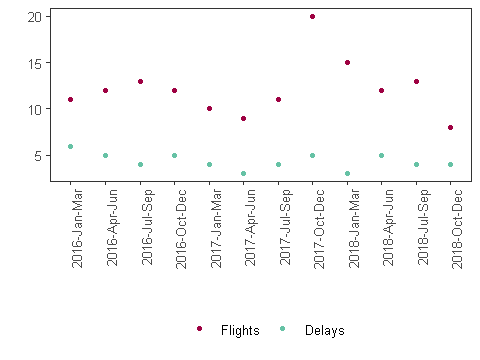

In [21]:
grfs <- plot.scatter(data,colors=mycolors[c(1,5)]) 
grfs <- grfs + theme(axis.text.x = element_text(angle=90, hjust=1))
plot(grfs)

## Line plot


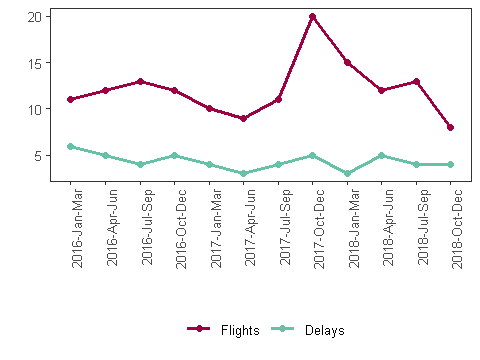

In [22]:
grfs <- plot.series(data,colors=mycolors[c(1,5)]) 
grfs <- grfs + theme(axis.text.x = element_text(angle=90, hjust=1))
plot(grfs)

## bar graph

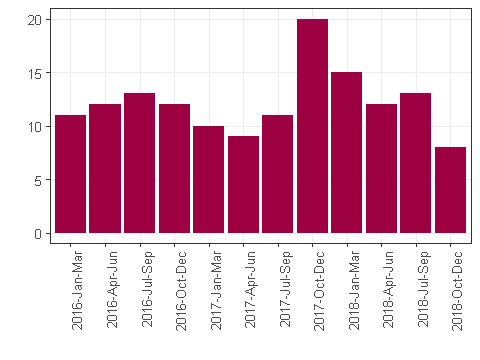

In [23]:
grf <- plot.bar(data %>% filter(variable=='Flights') %>% select(variable=x, value=value), colors=mycolors[1])
grf <- grf + theme(axis.text.x = element_text(angle=90, hjust=1))
plot(grf)

## grouped bar & stacked-bar

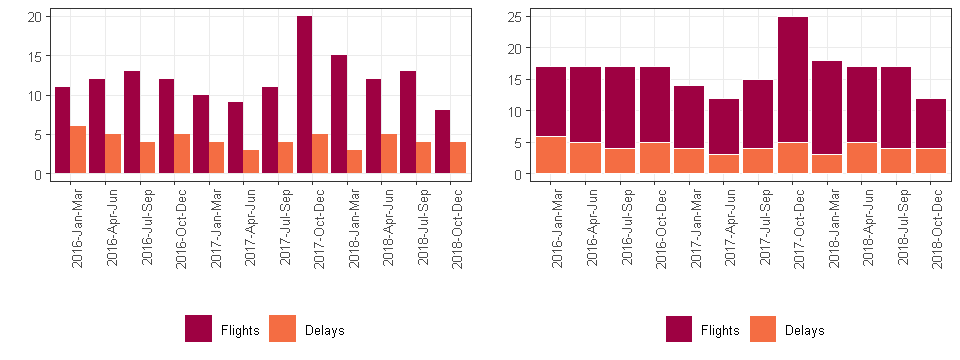

In [24]:
grfb <- plot.bar(data, colors=mycolors[1:2], group=TRUE)
grfb <- grfb + theme(axis.text.x = element_text(angle=90, hjust=1))
grfsb <- plot.stackedbar(data, colors=mycolors[1:2]) 
grfsb <- grfsb + theme(axis.text.x = element_text(angle=90, hjust=1))

options(repr.plot.width=8, repr.plot.height=3)
grid.arrange(grfb, grfsb, ncol=2)
options(repr.plot.width=4, repr.plot.height=3)

## Faced grouped bar

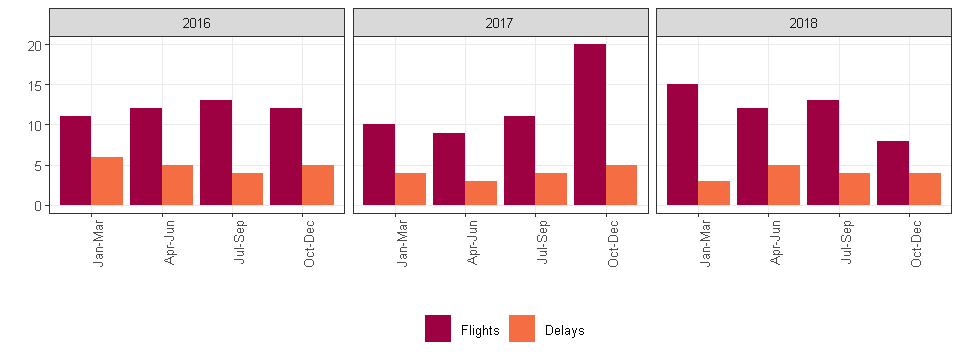

In [25]:
grf <- plot.bar(select(data, x=Months, face=Year, variable=variable, value=value), group=TRUE, colors=mycolors) + theme(axis.text.x = element_text(angle=90, hjust=1))
grf <- grf + xlab("")
grf <- grf + guides(fill=guide_legend(title=""))
grf <- grf + ylab("")
grf <- grf + facet_wrap(~face, ncol = 3) 

options(repr.plot.width=8, repr.plot.height=3)
plot(grf)
options(repr.plot.width=4, repr.plot.height=3)

## pie chart

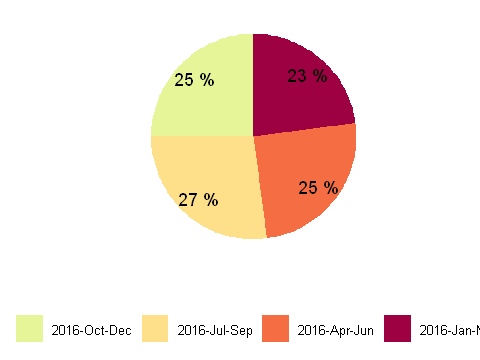

In [26]:
mypiedata <- data %>% filter(Year == 2016 & variable =="Flights") %>% select(variable=x, value=value)
mypiedata$colors <- mycolors[1:4]
mypiedata <- prepare.pieplot(mypiedata)

grfpie <- plot.pieplot(mypiedata, colors=as.character(mypiedata$colors))
plot(grfpie)

## lollipop plot

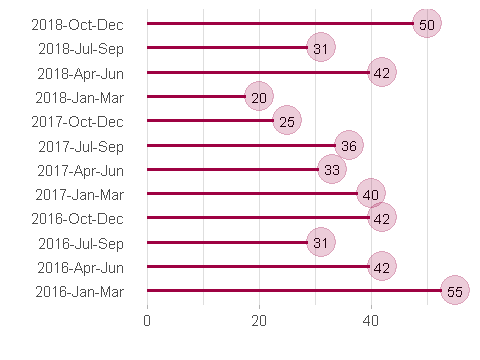

In [34]:
lolli <- merge(x = data %>% filter(variable =="Delays") %>% select(variable=x, delays=value), 
                y = data %>% filter(variable =="Flights") %>% select(variable=x, flights=value), 
                by.x="variable", by.y="variable") 
lolli$value <- round(100 * lolli$delays / lolli$flights)

grf <- plot_lollipop(lolli, mycolors[1], max_value_gap=2.25)
plot(grf)

## density plot

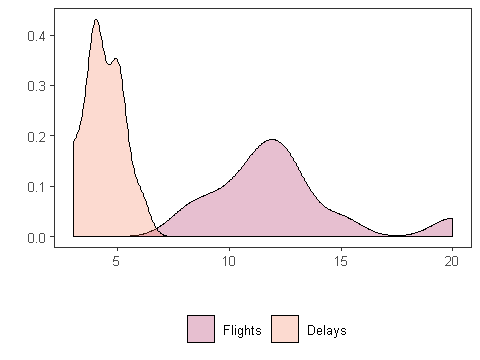

In [11]:
grfgd <- plot.density(data, label_series = "", colors=mycolors[c(1:5)])
plot(grfgd)

## Histogram

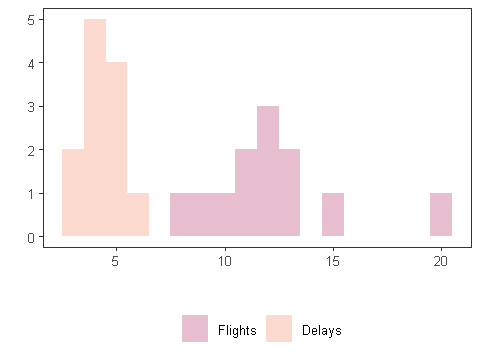

In [12]:
grfgd <- plot.hist(data, label_series = "", colors=mycolors[c(1:5)], bin=1)
plot(grfgd)

## Box-plot

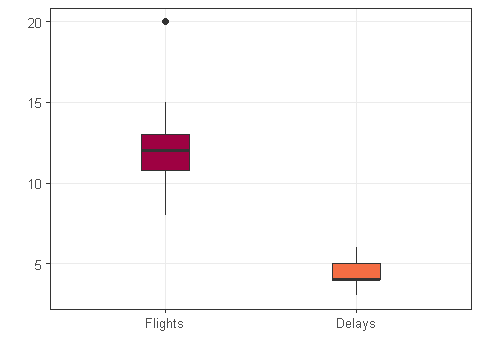

In [13]:
grfb <- plot.boxplot(data, colors=mycolors[1:2])
plot(grfb)

## Building PDF from graphics

In [13]:
pdf("examples/plot.pdf", width=4, height=3)
plot(grfb)
dev.off()

png 
  2